In [1]:
!nvidia-smi

Wed May 17 19:22:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [10]:

!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.5/586.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 26.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/yolov8

/content/drive/MyDrive/yolov8


In [7]:
ls

data/  data.yaml


In [8]:
pwd

'/content/drive/MyDrive/yolov8'

In [8]:
# Modes:
# train, val, predict

# Tasks:
# detect, segment, classify

# Data:
# Format can be differ for task type, Supports data.yaml, data_folder, data_name

In [12]:

%cd /content/drive/MyDrive/yolov8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/yolov8
Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify

In [13]:
!ls runs/detect/train/

args.yaml					    R_curve.png
confusion_matrix_normalized.png			    results.csv
confusion_matrix.png				    results.png
events.out.tfevents.1684352747.4a73e87fa1ac.6682.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
labels_correlogram.jpg				    train_batch2.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    weights


In [15]:

from ultralytics import YOLO

from IPython.display import display, Image

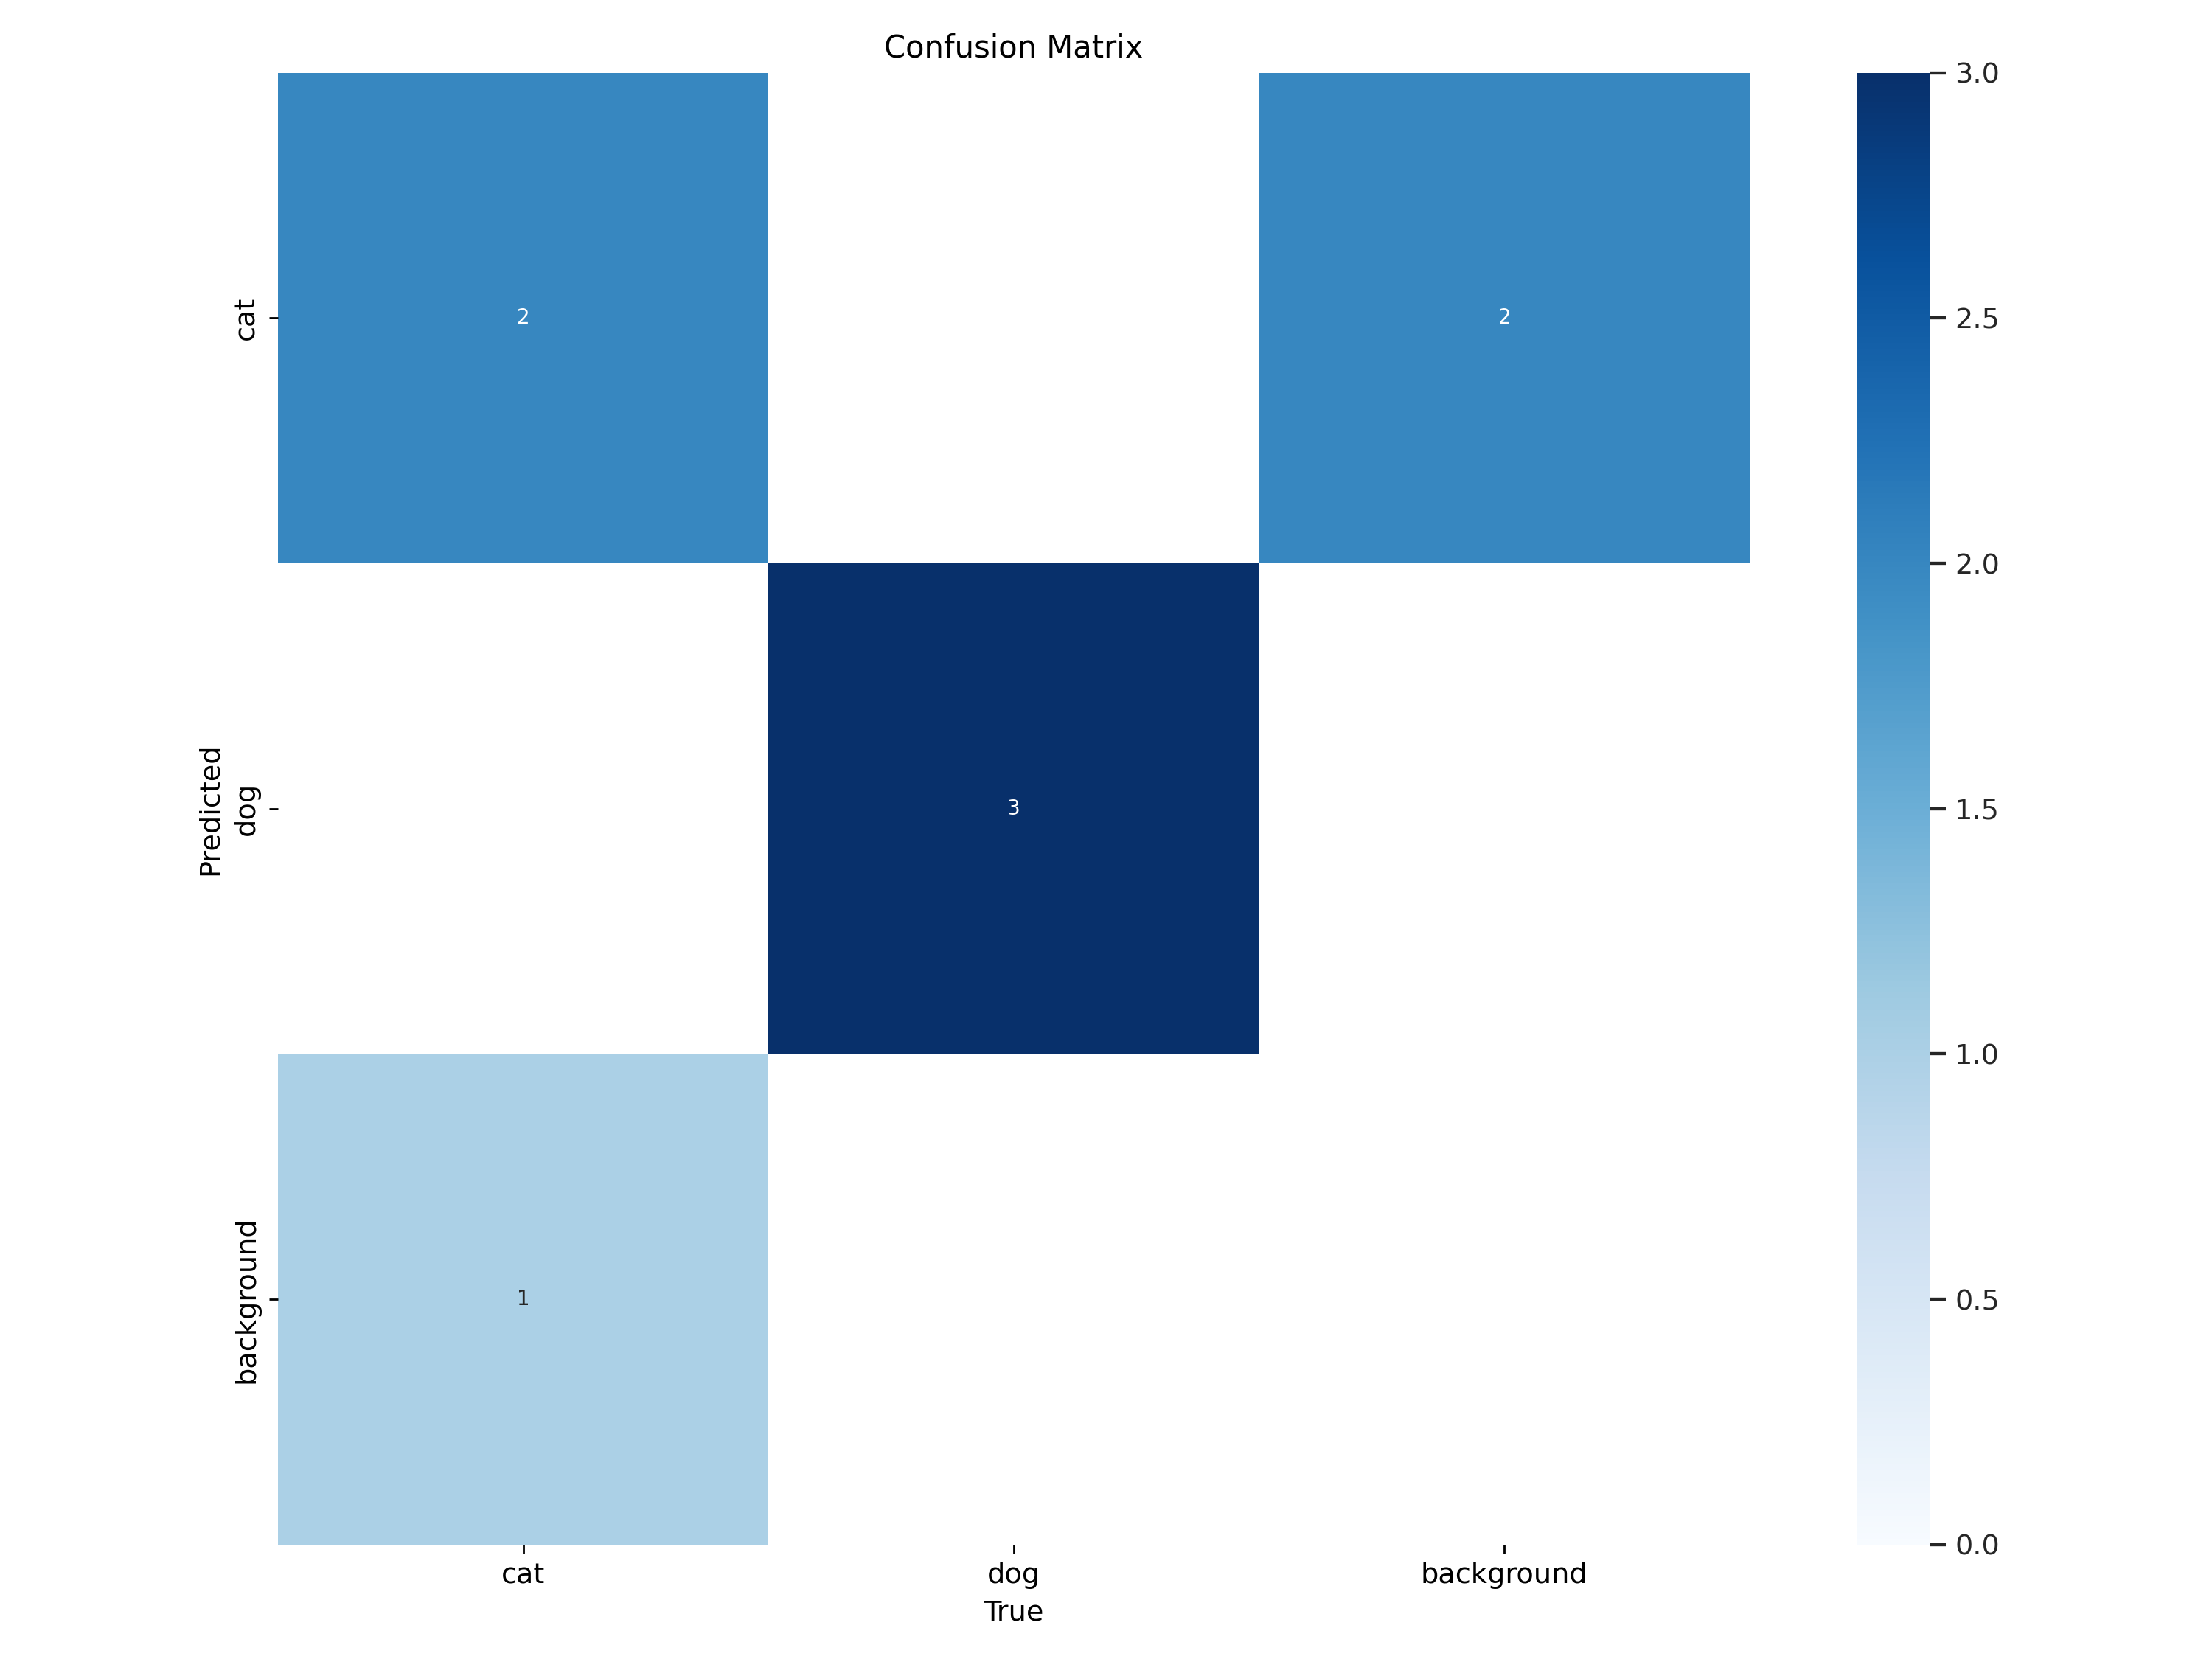

In [16]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

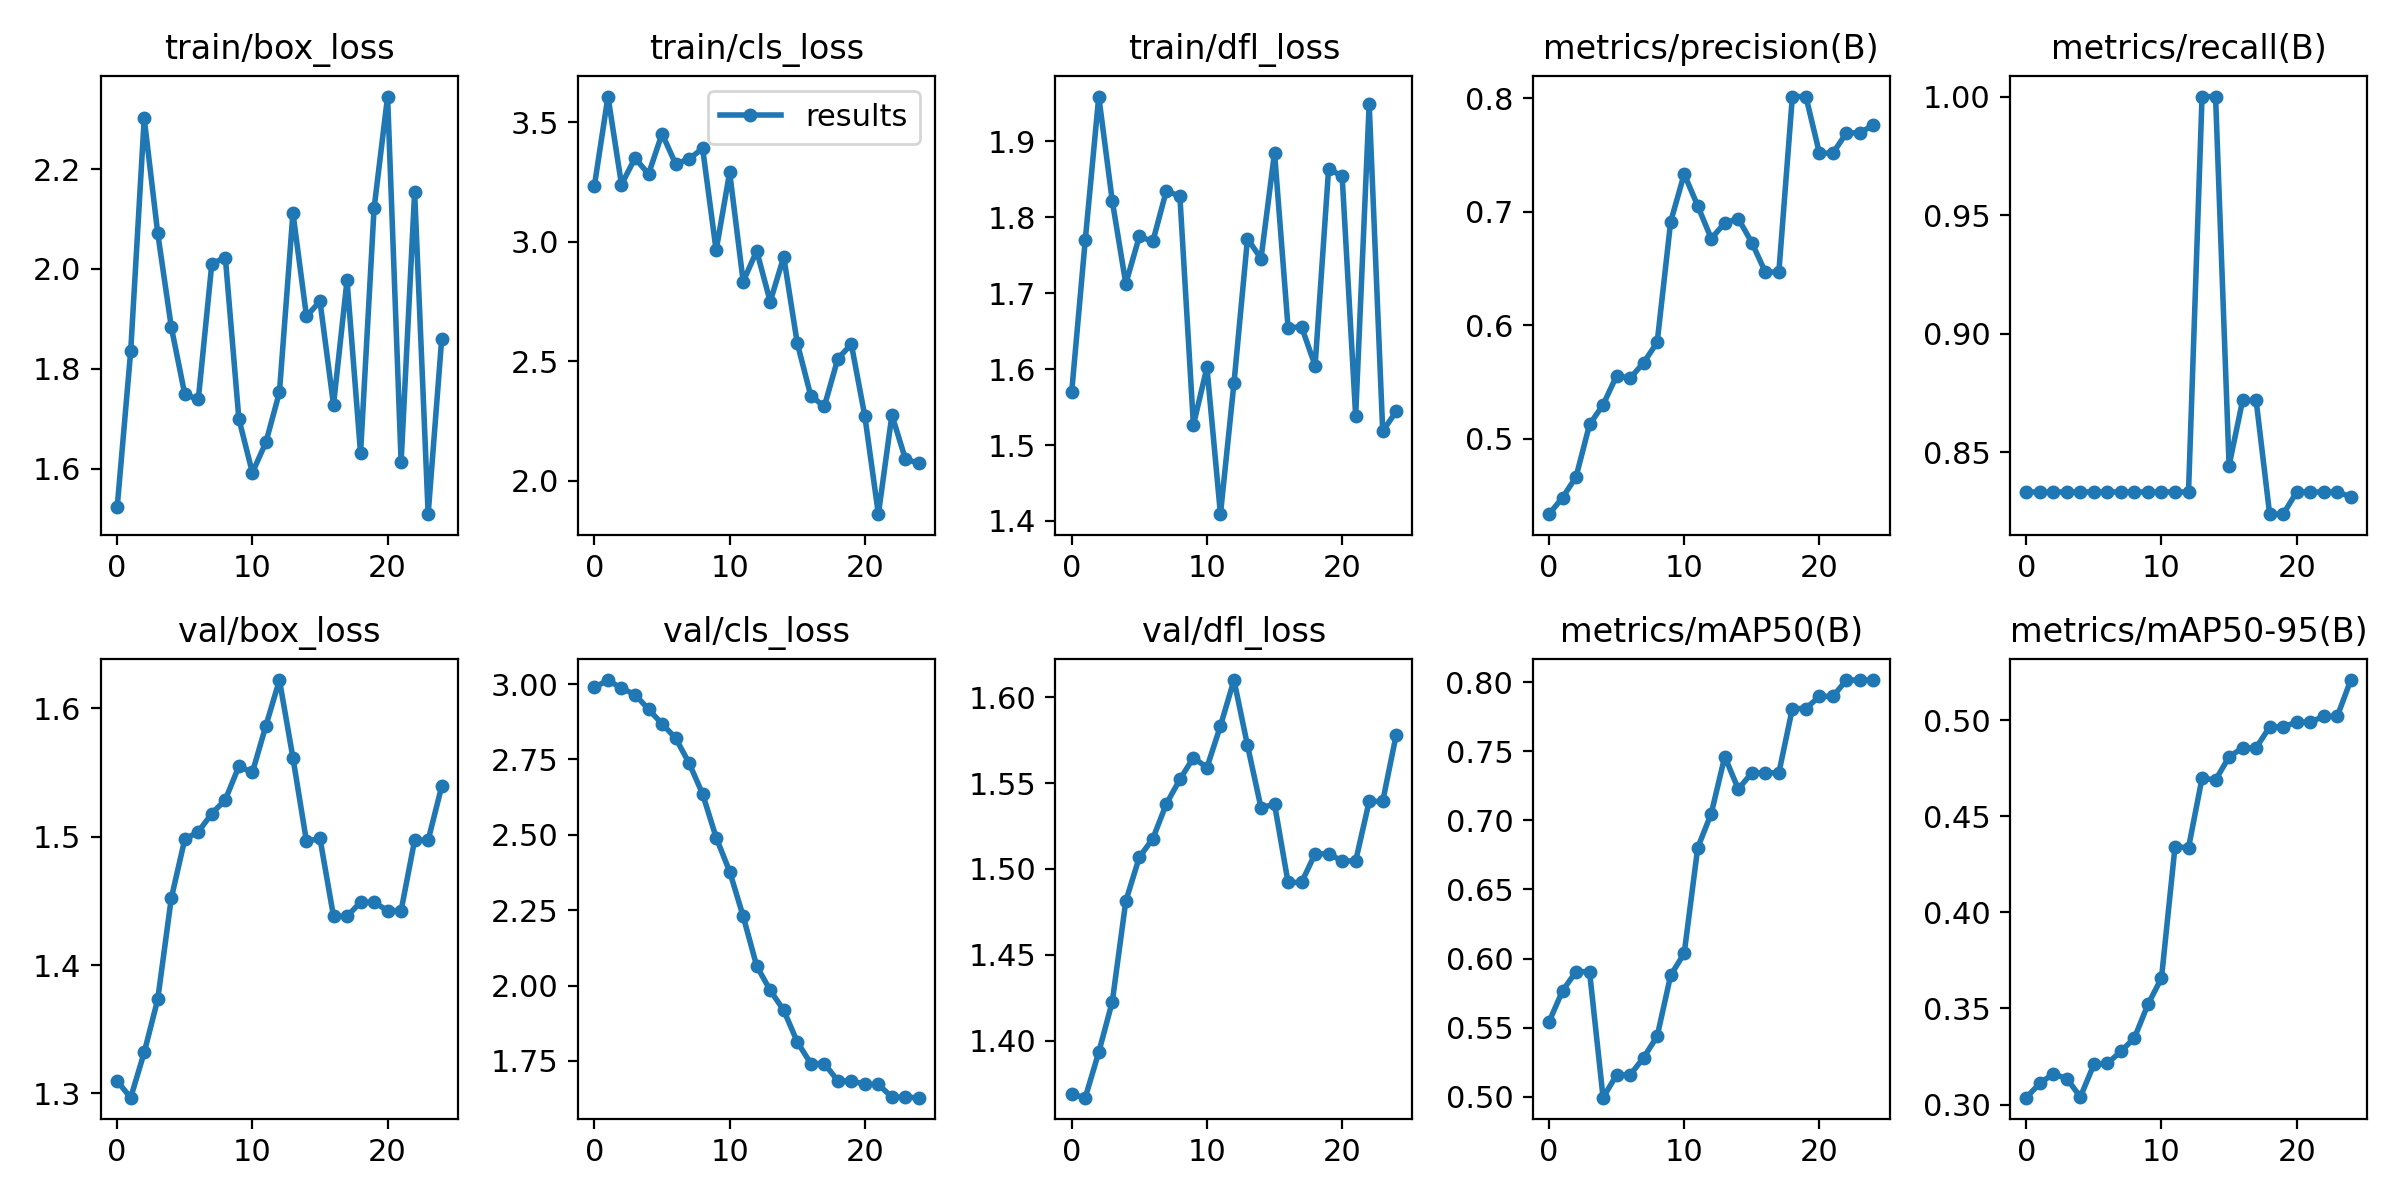

In [19]:
Image(filename='runs/detect/train/results.png', width=600)

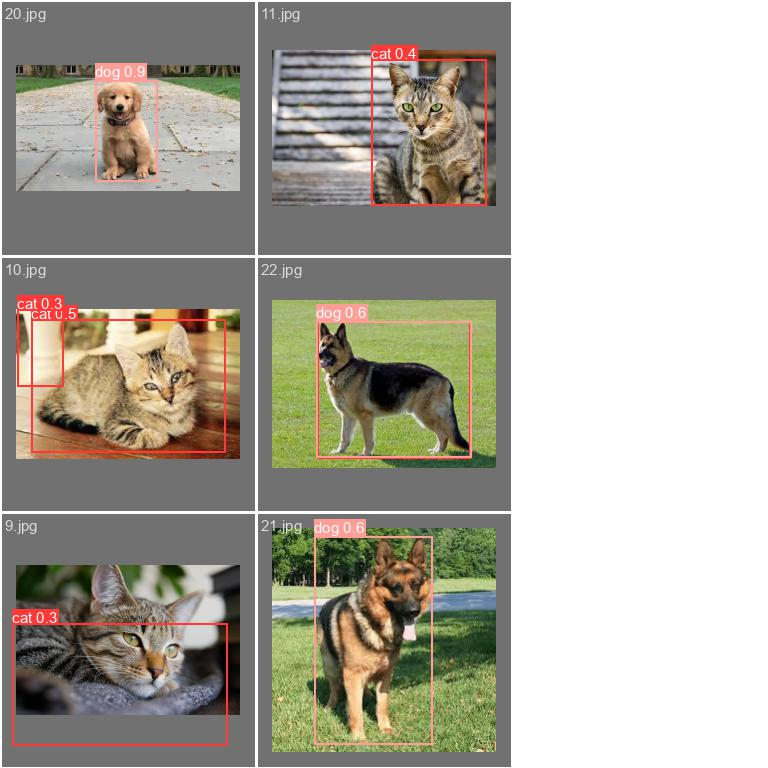

In [20]:

Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
# Validate Custom Model

In [22]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/yolov8/data/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  6.78it/s]
                   all          6          6      0.777      0.832      0.802      0.502
                   cat          6          3      0.665      0.664      0.608      0.174
                   dog          6          3      0.889          1      0.995       0.83
Speed: 0.1ms preprocess, 15.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# Inference with Custom Model

In [23]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/10 /content/drive/MyDrive/yolov8/data/test/images/1.jpg: 128x224 1 cat, 60.1ms
image 2/10 /content/drive/MyDrive/yolov8/data/test/images/12.jpg: 160x224 1 dog, 59.0ms
image 3/10 /content/drive/MyDrive/yolov8/data/test/images/13.jpg: 160x224 1 cat, 1 dog, 7.1ms
image 4/10 /content/drive/MyDrive/yolov8/data/test/images/14.jpg: 224x224 1 cat, 1 dog, 7.8ms
image 5/10 /content/drive/MyDrive/yolov8/data/test/images/15.jpg: 160x224 1 dog, 7.5ms
image 6/10 /content/drive/MyDrive/yolov8/data/test/images/16.jpg: 128x224 1 cat, 1 dog, 9.9ms
image 7/10 /content/drive/MyDrive/yolov8/data/test/images/2.jpg: 224x224 1 cat, 1 dog, 7.8ms
image 8/10 /content/drive/MyDrive/yolov8/data/test/images/3.jpg: 128x224 (no detections), 9.9ms
image 9/10 /content/drive/MyDrive/yolov8/data/test/images/4.jpg: 160x224 (no detections), 7.8ms
image 10/10 /c

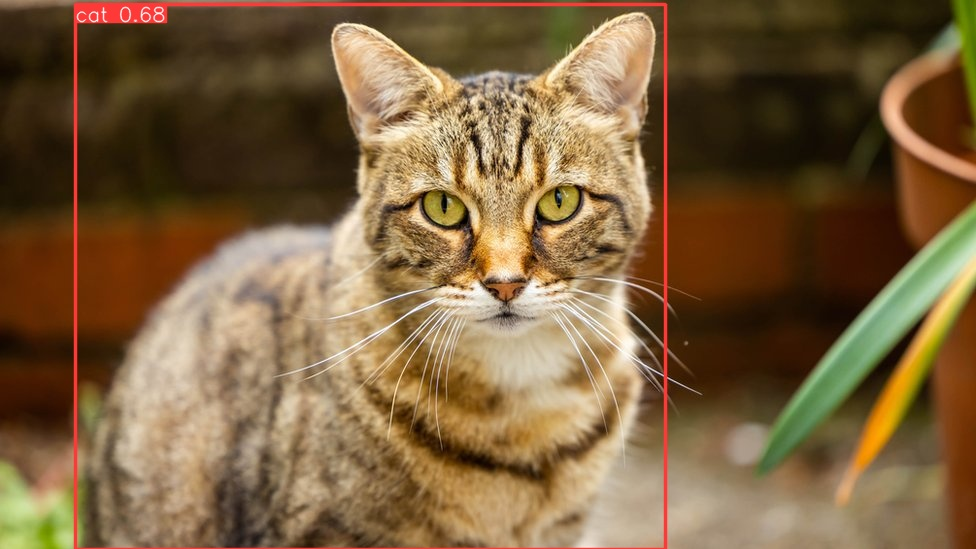

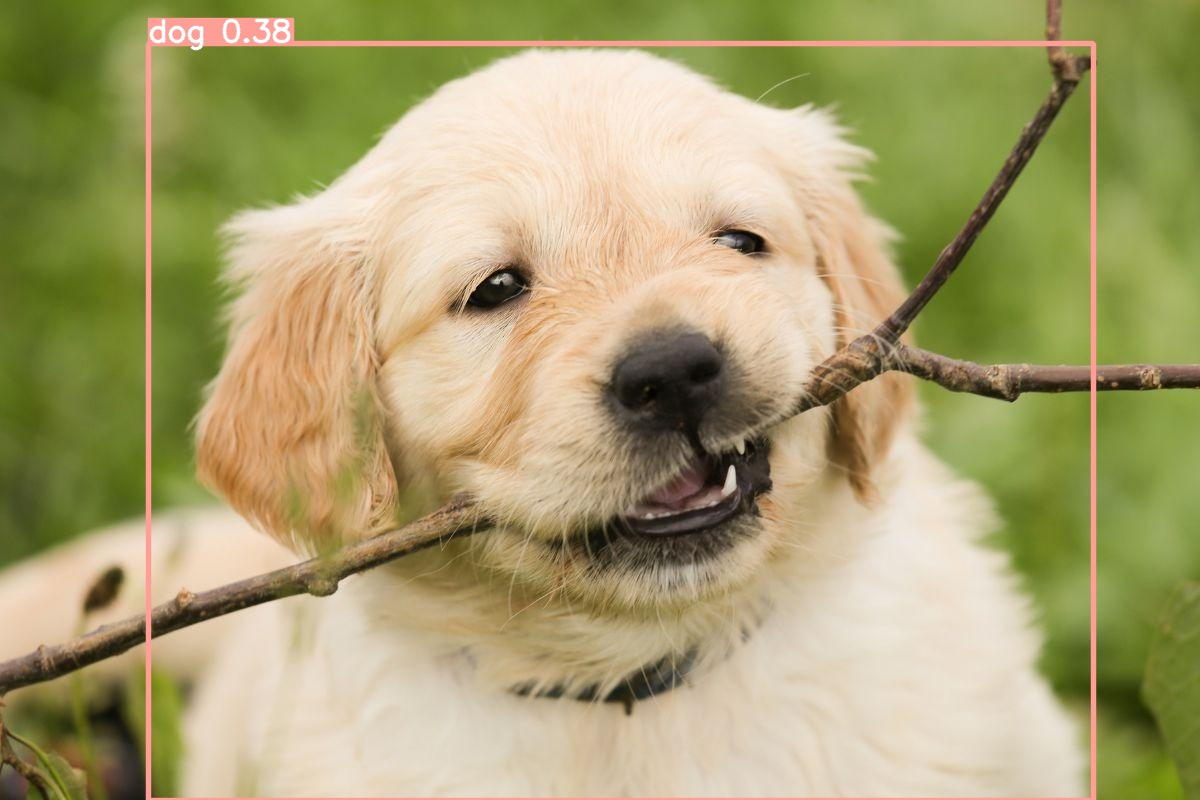

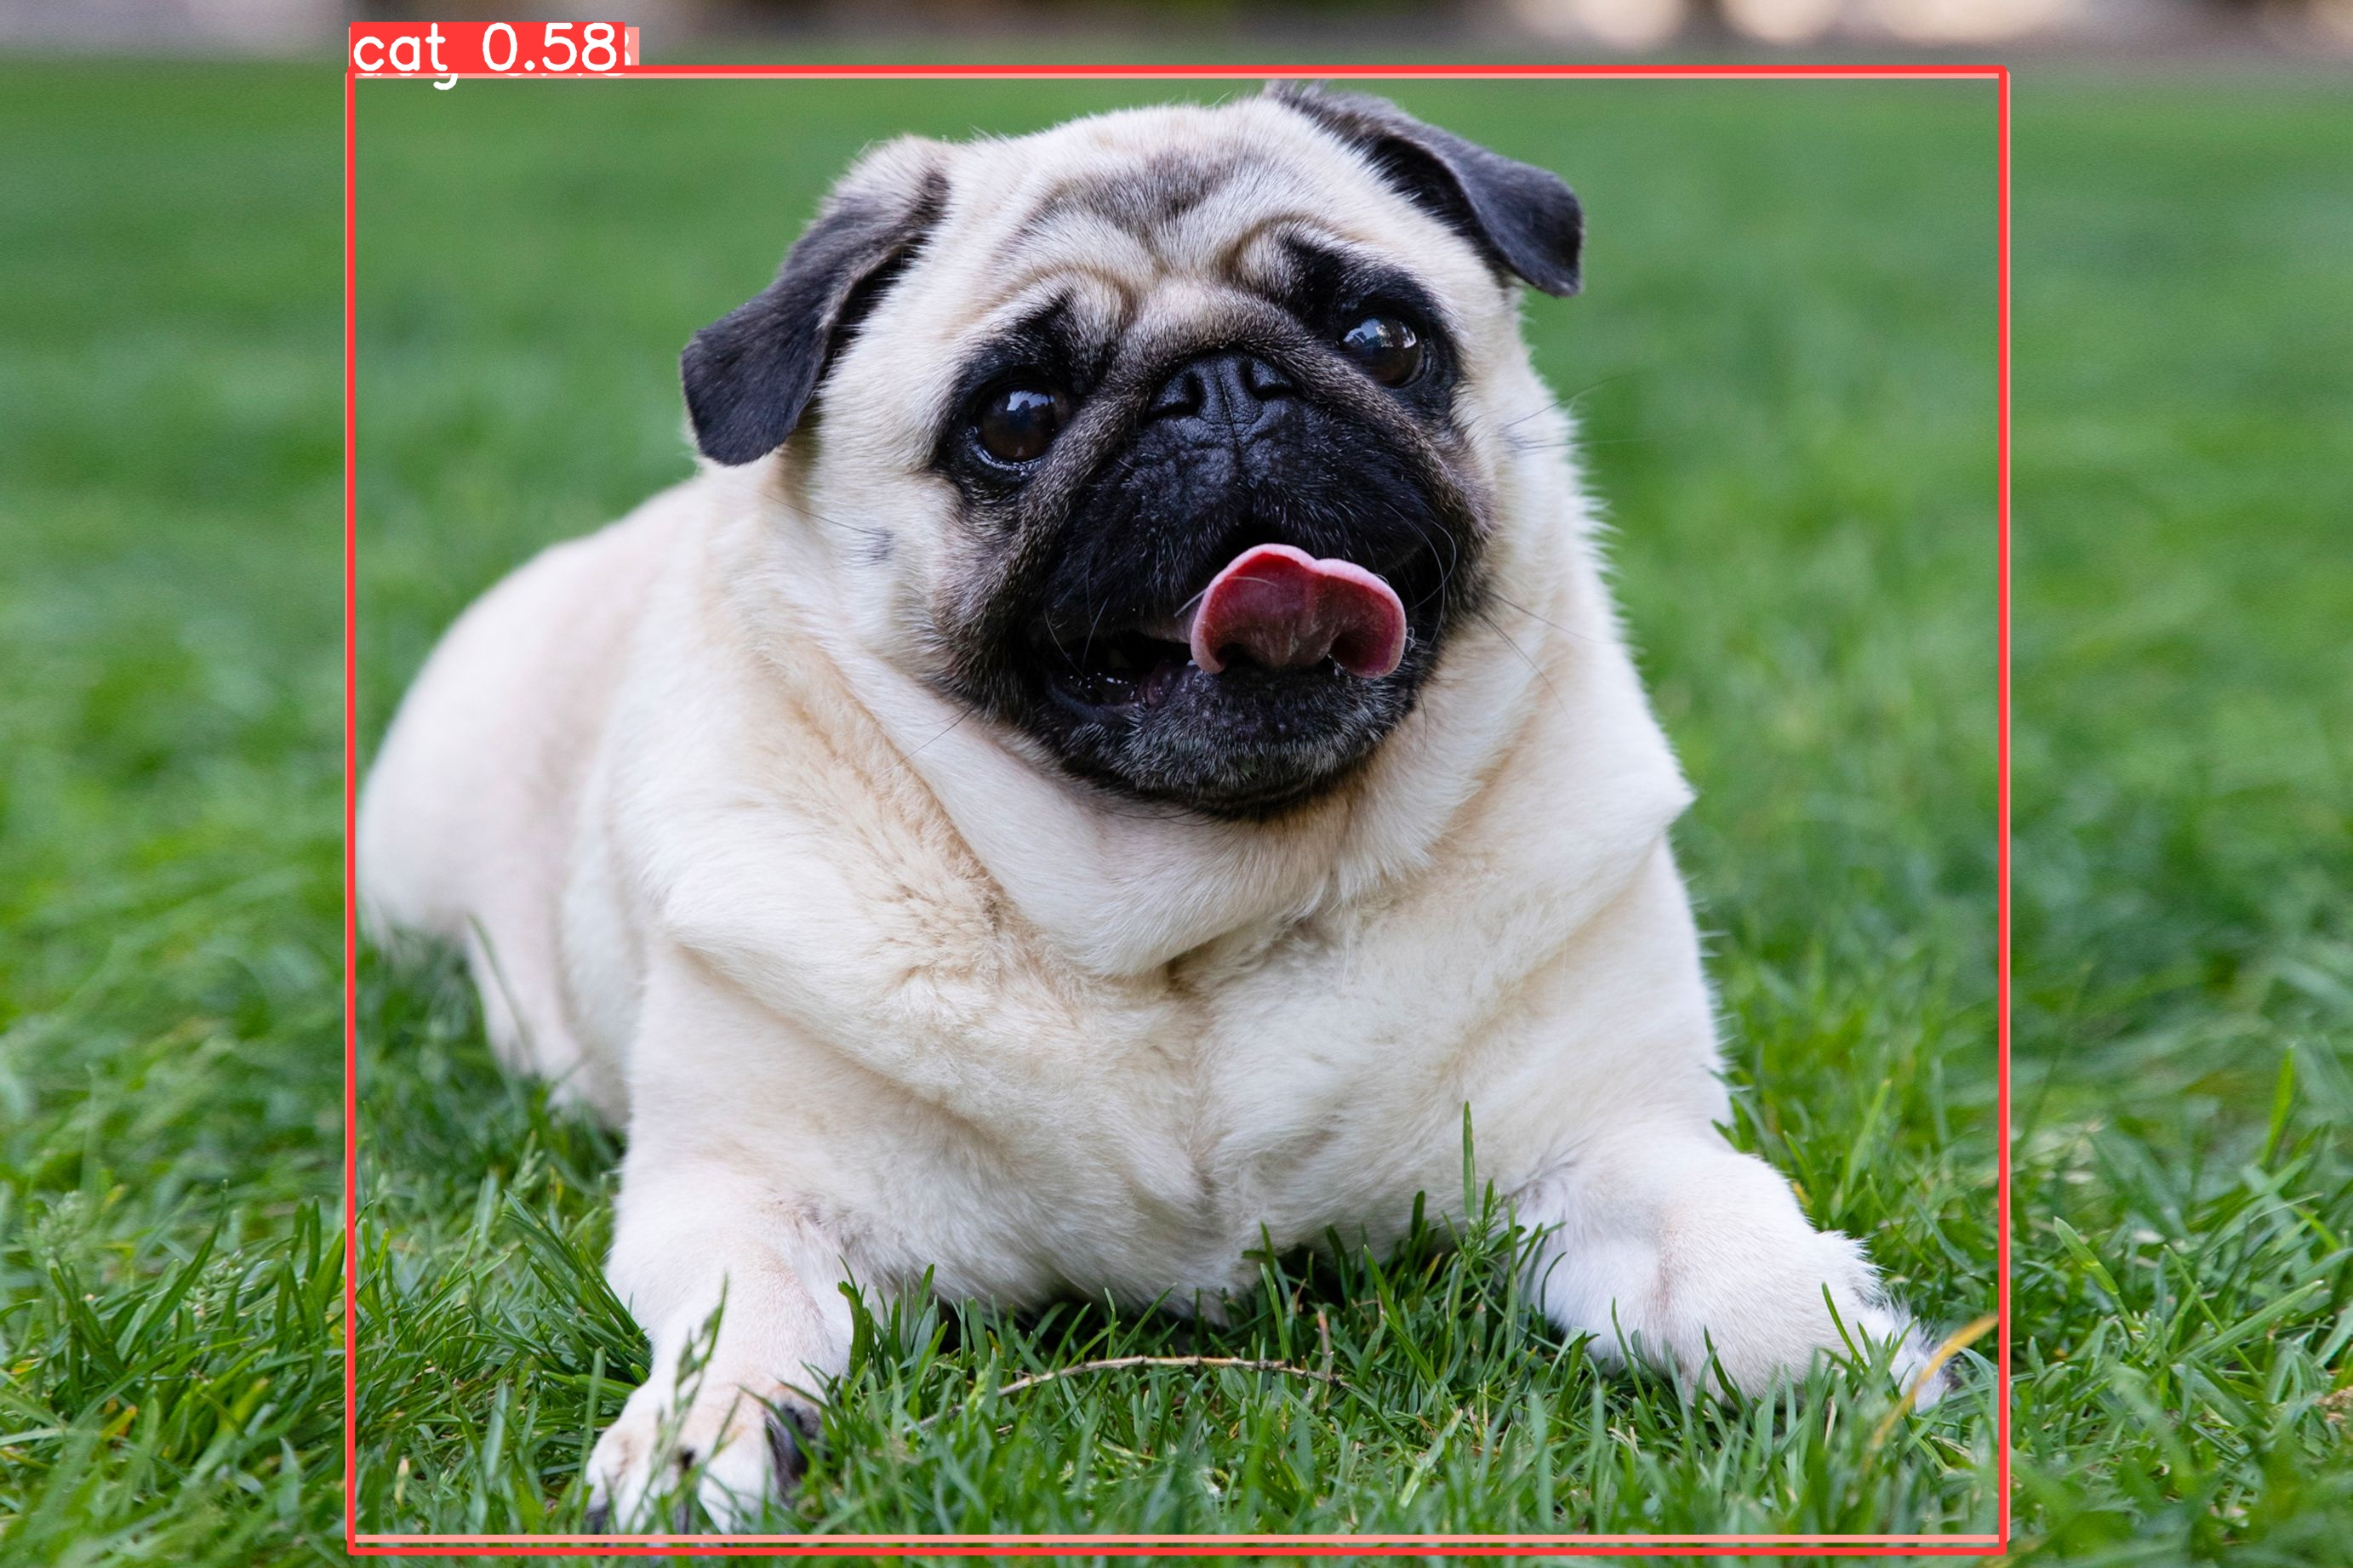

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")
     